In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [3]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("bengkulu.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  314 non-null    datetime64[ns]
 1   Tn       307 non-null    float64       
 2   Tx       312 non-null    float64       
 3   Tavg     312 non-null    float64       
 4   RH_avg   312 non-null    float64       
 5   RR       246 non-null    float64       
 6   ss       305 non-null    float64       
 7   ff_x     313 non-null    float64       
 8   ddd_x    312 non-null    float64       
 9   ff_avg   313 non-null    float64       
 10  ddd_car  313 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 27.1+ KB


<ipython-input-3-041ac831b2a5>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [4]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,19.8,29.8,1.0,23.7
1,2023-02-01,18.8,30.2,12.2,24.1
2,2023-03-01,20.0,29.6,16.0,22.9
3,2023-04-01,20.0,27.9,22.0,23.9
4,2023-05-01,20.4,29.0,NaN,23.7
...,...,...,...,...,...
309,2023-10-28,19.2,31.8,0.0,24.4
310,2023-10-29,19.2,32.2,3.6,26.1
311,2023-10-30,20.8,32.8,0.0,27.4
312,2023-10-31,20.8,32.4,0.0,27.6


In [5]:
# cek duplikat
df1.duplicated().sum()

9

In [6]:
# hapus duplikat
df1 = df1.drop_duplicates(keep='first').reset_index()
df1.duplicated().sum()

0

In [7]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [8]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,19.8,29.8,1.0,23.7
1,31,31,2023-01-02,NaN,29.8,7.4,25.2
2,59,60,2023-01-03,19.0,29.5,0.2,24.2
3,90,92,2023-01-04,21.2,29.6,7.0,24.8
4,120,123,2023-01-05,22.2,31.0,NaN,25.3
...,...,...,...,...,...,...,...
300,162,167,2023-12-06,22.4,30.8,NaN,25.6
301,192,198,2023-12-07,21.6,27.8,0.2,24.4
302,223,230,2023-12-08,21.4,31.0,0.0,24.7
303,254,262,2023-12-09,18.4,34.4,0.0,24.2


In [9]:
#cek null
df1.isnull().sum()

level_0     0
index       0
Tanggal     0
Tn          6
Tx          2
RR         64
Tavg        2
dtype: int64

In [10]:
# isi yang null
mrr = df1['RR'].mean()
ma = df1['Tavg'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       1
dtype: int64

In [11]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

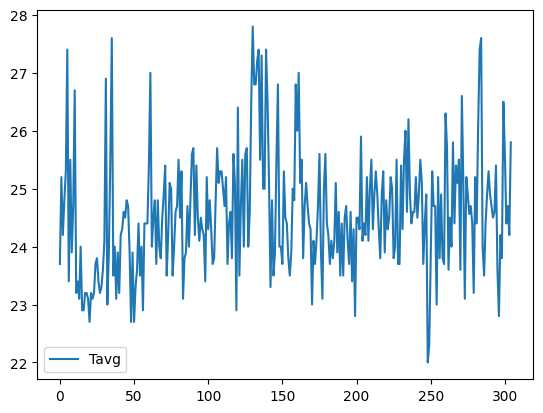

In [12]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

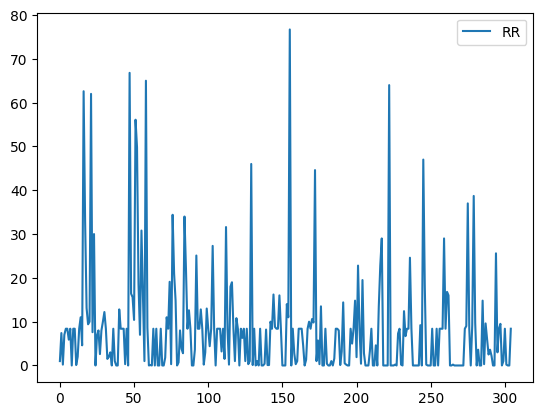

In [13]:
#plotting tavg
df1[['RR']].plot()

In [14]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,19.800000,29.8,1.000000,23.7,29.8,25.2,7.400000
1,31,31,2023-01-02,20.587625,29.8,7.400000,25.2,29.5,24.2,0.200000
2,59,60,2023-01-03,19.000000,29.5,0.200000,24.2,29.6,24.8,7.000000
3,90,92,2023-01-04,21.200000,29.6,7.000000,24.8,31.0,25.3,8.389627
4,120,123,2023-01-05,22.200000,31.0,8.389627,25.3,31.4,27.4,8.389627
...,...,...,...,...,...,...,...,...,...,...
300,162,167,2023-12-06,22.400000,30.8,8.389627,25.6,27.8,24.4,0.200000
301,192,198,2023-12-07,21.600000,27.8,0.200000,24.4,31.0,24.7,0.000000
302,223,230,2023-12-08,21.400000,31.0,0.000000,24.7,34.4,24.2,0.000000
303,254,262,2023-12-09,18.400000,34.4,0.000000,24.2,33.0,25.8,8.389627


In [15]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,1.000000,23.7,25.2,7.400000
1,7.400000,25.2,24.2,0.200000
2,0.200000,24.2,24.8,7.000000
3,7.000000,24.8,25.3,8.389627
4,8.389627,25.3,27.4,8.389627
...,...,...,...,...
300,8.389627,25.6,24.4,0.200000
301,0.200000,24.4,24.7,0.000000
302,0.000000,24.7,24.2,0.000000
303,0.000000,24.2,25.8,8.389627


In [16]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,1.000000,23.7,25.2,7.400000
1,7.400000,25.2,24.2,0.200000
2,0.200000,24.2,24.8,7.000000
3,7.000000,24.8,25.3,8.389627
4,8.389627,25.3,27.4,8.389627
...,...,...,...,...
299,1.000000,26.5,25.6,8.389627
300,8.389627,25.6,24.4,0.200000
301,0.200000,24.4,24.7,0.000000
302,0.000000,24.7,24.2,0.000000


In [17]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [18]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,1.000000,23.7,25.2,7.400000,0
1,7.400000,25.2,24.2,0.200000,1
2,0.200000,24.2,24.8,7.000000,2
3,7.000000,24.8,25.3,8.389627,3
4,8.389627,25.3,27.4,8.389627,4
...,...,...,...,...,...
299,1.000000,26.5,25.6,8.389627,299
300,8.389627,25.6,24.4,0.200000,300
301,0.200000,24.4,24.7,0.000000,301
302,0.000000,24.7,24.2,0.000000,302


In [19]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [20]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [21]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
X_test

,Indeks,Tavg
243,243,25.5
244,244,25.1
245,245,23.7
246,246,24.4
247,247,24.9
...,...,...
299,299,26.5
300,300,25.6
301,301,24.4
302,302,24.7


In [23]:
#testing
pred1 = lr.predict(X_test)
pred1

array([25.08223572, 24.95459781, 24.50323843, 24.73169411, 24.89540551,
       23.95846394, 24.05743105, 24.5448639 , 25.03229676, 24.83991455,
       24.84176521, 24.2932894 , 25.00732727, 24.55596789, 24.91391217,
       24.55966923, 24.52914775, 25.37267421, 25.180292  , 24.5023276 ,
       24.79552758, 24.63551751, 25.2200668 , 24.76870743, 25.09427955,
       24.99901378, 25.13035303, 24.51713292, 25.49014797, 25.00641644,
       24.36082419, 25.04248992, 24.94722415, 24.83981882, 24.88618119,
       24.79091541, 24.40430033, 25.05359391, 24.79646741, 25.34864456,
       25.77133312, 25.83792808, 24.67438149, 24.51437142, 24.8075714 ,
       24.9712828 , 25.10262205, 24.97498413, 24.9120905 , 24.84919688,
       24.88341969, 25.14424752, 24.56339956, 24.30627306, 24.76133377,
       24.63369585, 25.50959446, 25.22009581, 24.83348072, 24.93244782,
       24.77243776])

In [24]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

0.8496661277228773 1.1881821094402945


In [25]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
243,243,25.5
244,244,25.1
245,245,23.7
246,246,24.4
247,247,24.9
...,...,...
299,299,26.5
300,300,25.6
301,301,24.4
302,302,24.7


In [26]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
243,25.082236
244,24.954598
245,24.503238
246,24.731694
247,24.895406
...,...
299,25.509594
300,25.220096
301,24.833481


In [27]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-27-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,23.7,NaN
1,25.2,NaN
2,24.2,NaN
3,24.8,NaN
4,25.3,NaN
...,...,...
299,26.5,25.509594
300,25.6,25.220096
301,24.4,24.833481
302,24.7,24.932448


<Axes: >

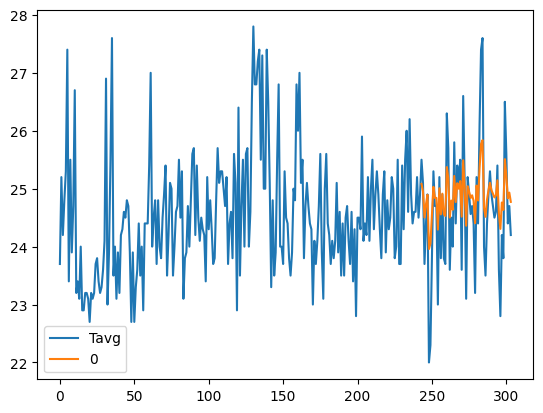

In [28]:
kan.plot()

In [29]:
new_data = [[350, 24.2],[351,24.2],[352,24.2],[353,24.2],[354,24.2],[355,24.2],[356,24.2]]
lr.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([24.85941904, 24.86126971, 24.86312037, 24.86497104, 24.8668217 ,
       24.86867237, 24.87052304])

In [30]:
kan.to_json('prediksi_bengkulu')